In [1]:
using PyPlot
include("gmm.jl");

In [2]:
gaussian_pdf(μ, σ²) = x -> exp(logpdf(gaussian, x, μ, σ²));

In [59]:
function visualize_trace(tr; color_shift=0, raw=false)
    n, k = get_args(tr)..., tr[:k]
    cmap = PyPlot.get_cmap("Paired")
    figure()
    
    for j=1:k
        y_js = [tr[:y => i] for i=1:n if tr[:z => i] == j]
        μ, σ² = tr[:μ => j], tr[:σ² => j]
        hist(y_js, normed=true, bins=6, color=cmap(2j-2 + 2color_shift), alpha=0.5)
        dom = (μ - 3sqrt(σ²)):1e-1:μ + 3sqrt(σ²)
        plot(dom, gaussian_pdf(μ, σ²).(dom), color=cmap(2j-1+ 2color_shift))
        plot(y_js, 5e-3 .+ zeros(length(y_js)), ".", color=cmap(2j-1 + 2color_shift))
        xlabel("x"); ylabel("density");
    end
    if raw
        plot(gt_ys, 0.25 .+ zeros(length(gt_ys)), "o", color="black", alpha=0.5)
    end
end;

In [4]:
# Synthetic data generator
function generate_synthetic_data()
    constraints = choicemap((:k, 4),
                            (:μ => 1, -20.0), (:μ => 2, 0.0), (:μ => 3, 10.0), (:μ => 4, 30.0),
                            (:σ² => 1, 3.0),  (:σ² => 2, 8.0), (:σ² => 3, 7.0), (:σ² => 4, 1.0))
    generate(gmm, (NUM_DATA_POINTS,), constraints)
end;

In [5]:
gt_k = 4
gt_ys = [-7.87951290075215, -23.251364738213493, -5.34679518882793, -3.163770449770572,
10.524424782864525, 5.911987013277482, -19.228378698266436, 0.3898087330050574,
8.576922415766697, 7.727416085566447, -18.043123523482492, 9.108136117789305,
29.398734347901787, 2.8578485031858003, -20.716691460295685, -18.5075008084623,
-21.52338318392563, 10.062657028986715, -18.900545157827718, 3.339430437507262,
3.688098690412526, 4.209808727262307, 3.371091291010914, 30.376814419984456,
12.778653273596902, 28.063124205174137, 10.70527515161964, -18.99693615834304,
8.135342537554163, 29.720363913218446, 29.426043027354385, 28.40516772785764,
31.975585225366686, -20.642437143912638, 30.84807631345935, -21.46602061526647,
12.854676808303978, 30.685416799345685, 5.833520737134923, 7.602680172973942,
10.045516408942117, 28.62342173081479, -20.120184774438087, -18.80125468061715,
12.849708921404385, 31.342270731653656, 4.02761078481315, -19.953549865339976,
-2.574052170014683, -21.551814470820258, -2.8751904316333268,
13.159719198798443, 8.060416669497197, 12.933573330915458, 0.3325664001681059,
11.10817217269102, 28.12989207125211, 11.631846911966806, -15.90042467317705,
-0.8270272159702201, 11.535190070081708, 4.023136673956579,
-22.589713328053048, 28.378124912868305, -22.57083855780972,
29.373356677376297, 31.87675796607244, 2.14864533495531, 12.332798078071061,
8.434664672995181, 30.47732238916884, 11.199950328766784, 11.072188217008367,
29.536932243938097, 8.128833670186253, -16.33296115562885, 31.103677511944685,
-20.96644212192335, -20.280485886015406, 30.37107537844197, 10.581901339669418,
-4.6722903116912375, -20.320978011296315, 9.141857987635252, -18.6727012563551,
7.067728508554964, 5.664227155828871, 30.751158861494442, -20.198961378110013,
-4.689645356611053, 30.09552608716476, -19.31787364001907, -22.432589846769154,
-0.9580412415863696, 14.180597007125487, 4.052110659466889,
-18.978055134755582, 13.441194891615718, 7.983890038551439, 7.759003567480592]
gt_zs = [2, 1, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 4, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 4, 3, 4,
      3, 1, 3, 4, 4, 4, 4, 1, 4, 1, 3, 4, 3, 3, 3, 4, 1, 1, 3, 4, 3, 1, 2, 1, 2,
      3, 3, 3, 2, 3, 4, 3, 1, 2, 3, 2, 1, 4, 1, 4, 4, 2, 3, 3, 4, 3, 3, 4, 3, 1,
      4, 1, 1, 4, 3, 2, 1, 3, 1, 3, 3, 4, 1, 2, 4, 1, 1, 2, 3, 2, 1, 3, 3, 3]
gt_ws = [0.20096082191563705, 0.22119959941799663, 0.3382086364817468, 0.23963094218461967]
gt_μs = [-20.0, 0.0, 10.0, 30.0]
gt_σ²s = [3.0, 8.0, 7.0, 1.0]
gt_constraints = make_constraints(gt_ys, gt_μs, gt_σ²s, gt_zs)
for (i, w) in enumerate(gt_ws) gt_constraints[:w => i] = w end
ground_truth_tr, = generate(gmm, (100,), gt_constraints);

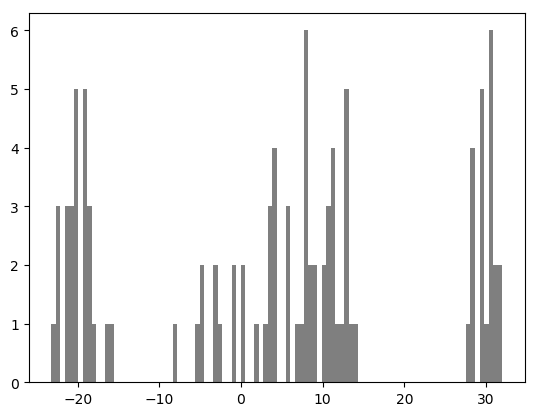

In [6]:
hist(gt_ys, bins=100, color="black", alpha=0.5);

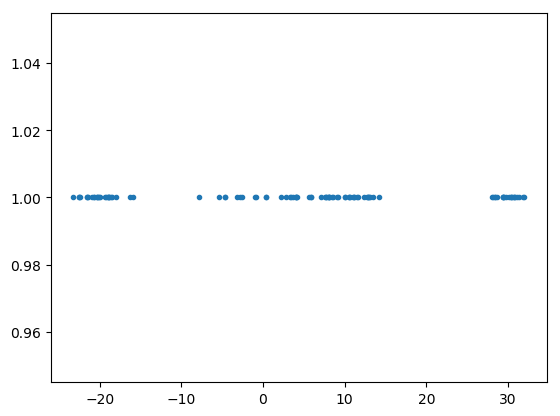

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f812f197390>

In [7]:
plot(gt_ys, ones(length(gt_ys)), ".")

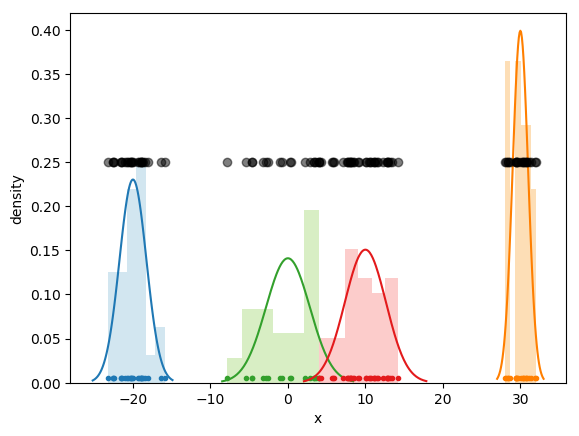

score: -386.7981337513082

In [60]:
#NUM_DATA_POINTS = 100
#tr, = generate_synthetic_data()
visualize_trace(ground_truth_tr; raw=true);
print("score: $(get_score(ground_truth_tr))");

In [90]:
#=for y in (get_retval(tr))
    println(y)
    end=#

In [91]:
#get_choices(tr)

In [108]:
#inference_tr = initial_trace(get_retval(tr), poisson(λ), 4)
inference_constraints = choicemap([(:y => i, y) for (i, y) in enumerate(gt_ys)]...)
#visualize_trace(inference_tr);

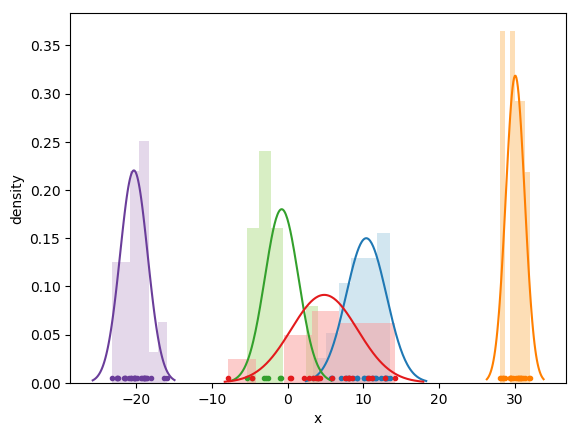

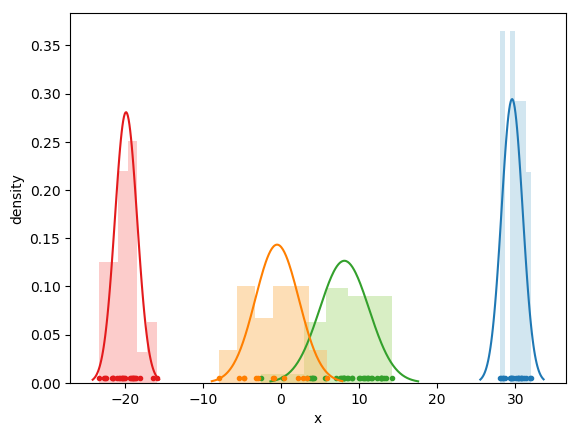

In [111]:
mcmc_tr1, = generate(gmm, (100,), inference_constraints)
mcmc_tr2, = generate(gmm, (100,), inference_constraints);
scores1, scores2 = [], []
best_tr1, best_tr2 = mcmc_tr1, mcmc_tr2
for _=1:500
    push!(scores1, get_score(mcmc_tr1))
    push!(scores2, get_score(mcmc_tr2))
    best_tr1 = scores1[end] > get_score(best_tr1) ? mcmc_tr1 : best_tr1
    best_tr2 = scores2[end] > get_score(best_tr2) ? mcmc_tr2 : best_tr2
    mcmc_tr1, mcmc_tr2 = map(mcmc_kernel, (mcmc_tr1, mcmc_tr2))
end
visualize_trace(mcmc_tr1)
visualize_trace(mcmc_tr2);

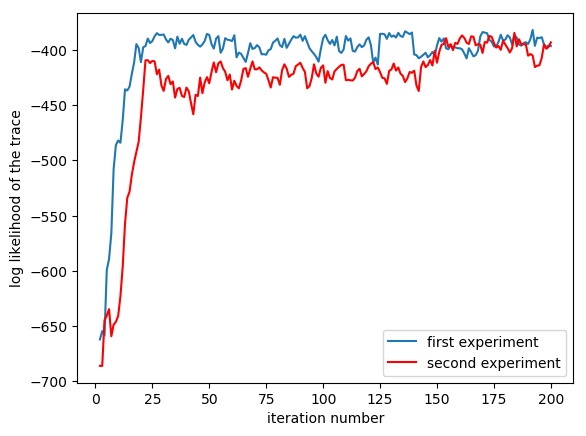

In [124]:
figure()
xlabel("iteration number")
ylabel("log likelihood of the trace")
plot(2:200, scores1[2:200], label="first experiment");
plot(2:200, scores2[2:200], color="red", label="second experiment")
legend();

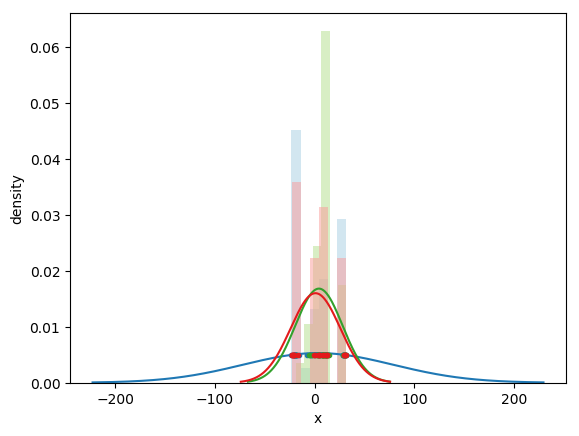

In [23]:
blog_k = 3
blog_μs = [ 3.488798471029484, 4.373726117242063, 0.9231443842192878]
blog_σ²s = 1 ./ [0.0132705119677527, 0.04211645365419925, 0.04006072837972027].^2
blog_zs = [1, 1, 2, 1, 2, 3, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 1, 2, 1, 2, 3, 3, 2, 1, 2, 1,
           2, 1, 2, 1, 3, 2, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3, 1, 2,
           2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 1, 1, 1, 3, 3, 1,
           1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 3, 2]

blog_constraints = make_constraints(gt_ys, blog_μs, blog_σ²s, blog_zs)
blog_tr, = generate(gmm, (100,), blog_constraints)
visualize_trace(blog_tr)

In [127]:
#=for kk=1:blog_k
    subtr_idxs = blog_zs .== kk;
    y_subtr = ys[subtr_idxs];
    subtr_constraints = make_constraints(y_subtr, [blog_μs[kk]], [blog_σ²s[kk]], ones(sum(subtr_idxs)))
    subtr, = generate(gmm, (sum(subtr_idxs),), subtr_constraints)
    visualize_trace(subtr, color_shift=kk-1)
end=#

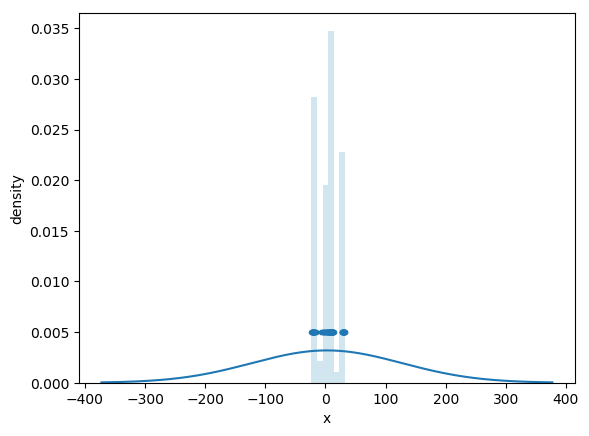

In [130]:
blog_k2 = 2
blog_μs2 = [2.4724]
blog_σ²s2 = 1 ./ [0.008].^2
blog_zs2 = ones(Int, length(gt_ys))

blog2_constraints = make_constraints(gt_ys, blog_μs2, blog_σ²s2, blog_zs2)
blog_tr2, = generate(gmm, (100,), blog2_constraints)
visualize_trace(blog_tr2)
